In [38]:
import numpy as np
import matplotlib.pyplot as plt


In [39]:
def gaussian_beam(rho, z, wavelength, w0, A0, w):
    k = 2*np.pi/wavelength
    z0 = np.pi*w0**2/wavelength
    R = z*(1+(z0/z)**2)
    return A0*(w0/w)*np.exp(-rho**2/w**2)*np.exp(-1j*k*(rho**2)/(2*R))*np.exp(1j*np.arctan(z/z0))

In [40]:
class GaussianBeam:
    def __init__(self, wavelength, z0, A0):
        self.wavelength = wavelength
        self.z0 = z0
        self.A0 = A0

    def w_0(self):
            return np.sqrt(self.wavelength*self.z0/np.pi)

    def w(self, z):
            w0 = self.w_0()   
            return w0*np.sqrt(1+(z/self.z0)**2)
        
    def R(self, z):
            return z*(1+(self.z0/(z + 1e-15))**2)
        
    def zeta(self, z):
            return np.arctan(z/self.z0)

    def wavefunction(self, x, y, z):
        rho = np.sqrt(x**2 + y**2)
        A0 = self.A0
        w0 = self.w_0()
        w = self.w(z)
        k = 2*np.pi/self.wavelength
        R = self.R(z)
        zeta = self.zeta(z)
        return A0*(w0/w)*np.exp(-rho**2/(w**2 + 1e-15))*np.exp(-1j*k*(rho**2)/(2*R + 1e-15))*np.exp(1j*zeta)

    def intensity(self, x, y, z):
        return np.abs(self.wavefunction(x, y, z))**2
    

In [41]:
# Define the laser beam
wavelength = 632.8e-9  # wavelength in meters (HeNe laser)
beam_width = 3e-6     # beam width in meters (diameter)
length = 1          # Cavity Length
laser = GaussianBeam(wavelength, length, 1)

In [42]:
# Define the range of x and y values to plot
x = np.linspace(-1e-3, 1e-3, 500)
x2 = np.linspace(-1e-3, 1e-3, 500)
# x = np.sqrt(x1**2 + x2**2)
y = np.linspace(-1e-3, 1e-3, 500)

In [43]:
# Calculate the intensity at each (x, y) point
X, Y = np.meshgrid(x, y)
z = np.linspace(0, 1, 100)
Z = [laser.intensity(X, Y, zed) for zed in z] # Laser intentsity 
Z = np.array(Z)

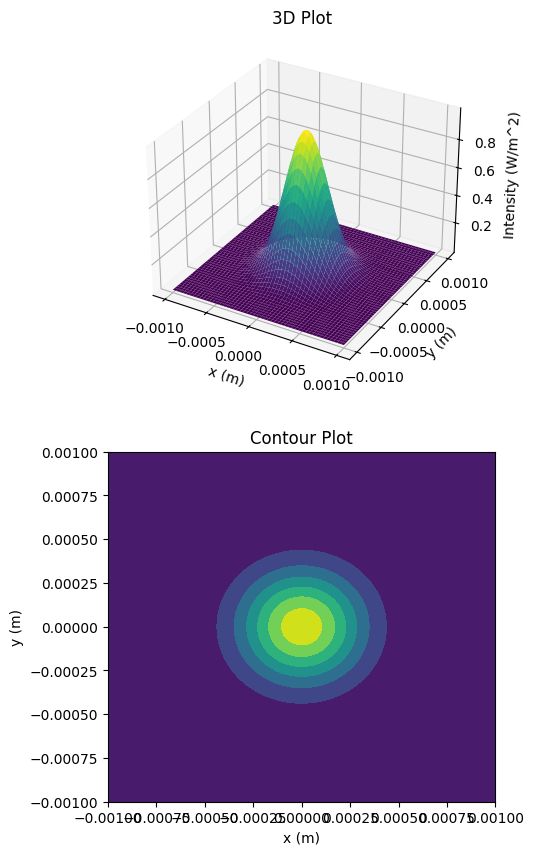

In [44]:
# Plot the intensity in 3D
fig = plt.figure(figsize=(5, 10))
ax = fig.add_subplot(2, 1, 1, projection='3d')
ax.plot_surface(X, Y, Z[0], cmap='viridis')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('Intensity (W/m^2)')
ax.set_title('3D Plot')

# Plot the intensity as a contour map
ax = fig.add_subplot(2, 1, 2)
ax.contourf(X, Y, Z[0], cmap='viridis')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_title('Contour Plot')
plt.show()

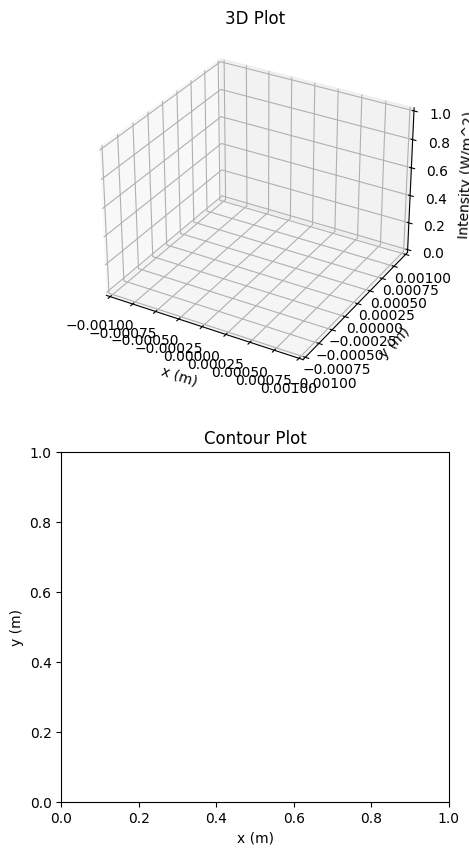

In [45]:
# Animate the intensity as a function of z
from matplotlib import animation
from IPython.display import HTML

fig = plt.figure(figsize=(5, 10))
ax = fig.add_subplot(2, 1, 1, projection='3d')
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_zlabel('Intensity (W/m^2)')
ax.set_title('3D Plot')

ax.set_xlim(-0.001, 0.001)
ax.set_ylim(-0.001, 0.001)
ax.set_zlim(0, 1)

ax2 = fig.add_subplot(2, 1, 2)
ax2.set_xlabel('x (m)')
ax2.set_ylabel('y (m)')
ax2.set_title('Contour Plot')

def animate(i):
    ax.clear()
    ax2.clear()
    ax.plot_surface(X, Y, Z[i], cmap='viridis')
    ax2.contourf(X, Y, Z[i], cmap='viridis')
    ax.set_title('3D Plot, z = {:.2f} m'.format(z[i]))
    ax2.set_title('Contour Plot, z = {:.2f} m'.format(z[i]))
    ax.set_xlim(-0.001, 0.001)
    ax.set_ylim(-0.001, 0.001)
    ax.set_zlim(0, 1)

# anim = animation.FuncAnimation(fig, animate, frames=len(z), interval=100)
# HTML(anim.to_html5_video())
# anim.save('animation.mp4', writer='ffmpeg', fps=30)

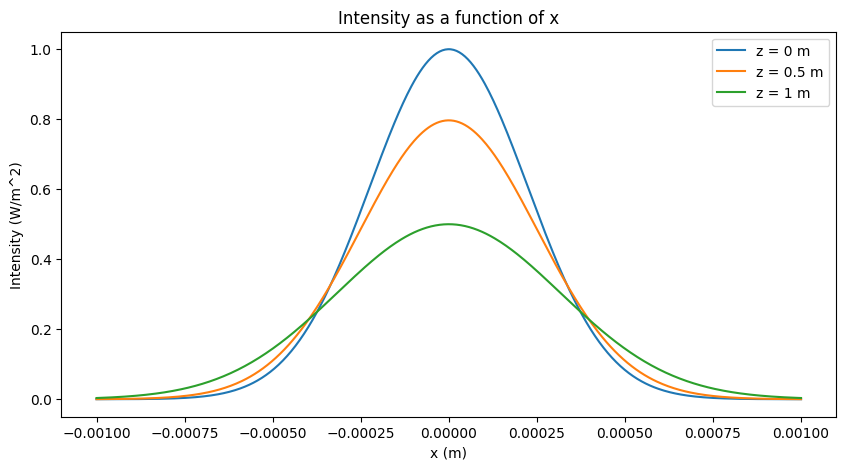

In [46]:
# Plot the intensity as a function of rho
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, Z[0][250], label='z = 0 m')
ax.plot(x, Z[50][250], label='z = 0.5 m')
ax.plot(x, Z[99][250], label='z = 1 m')
ax.set_xlabel('x (m)')
ax.set_ylabel('Intensity (W/m^2)')
ax.set_title('Intensity as a function of x')
ax.legend()
plt.show()

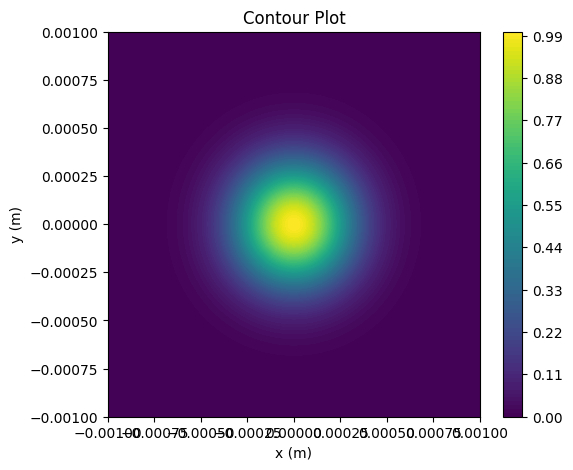

In [47]:
from matplotlib import ticker
# Plot the intensity as a function of z in a countour plot
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(1, 1, 1)
CS = ax.contourf(X, Y, Z[0], cmap='viridis', levels=100)
ax.set_xlabel('x (m)')
ax.set_ylabel('y (m)')
ax.set_title('Contour Plot')
cbar = fig.colorbar(CS)
plt.show()


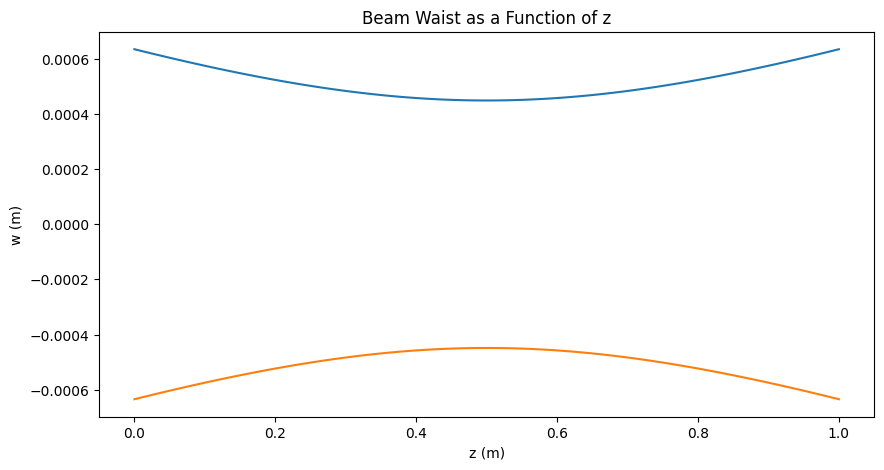

In [48]:
# plot waist as a function of z
fig = plt.figure(figsize=(10, 5))
z2 = np.linspace(-1, 1, 100)
ax = fig.add_subplot(1, 1, 1)
ax.plot(z, [laser.w(zed) for zed in z2])
ax.plot(z, [-laser.w(zed) for zed in z2])
ax.set_xlabel('z (m)')
ax.set_ylabel('w (m)')
ax.set_title('Beam Waist as a Function of z')
plt.show()


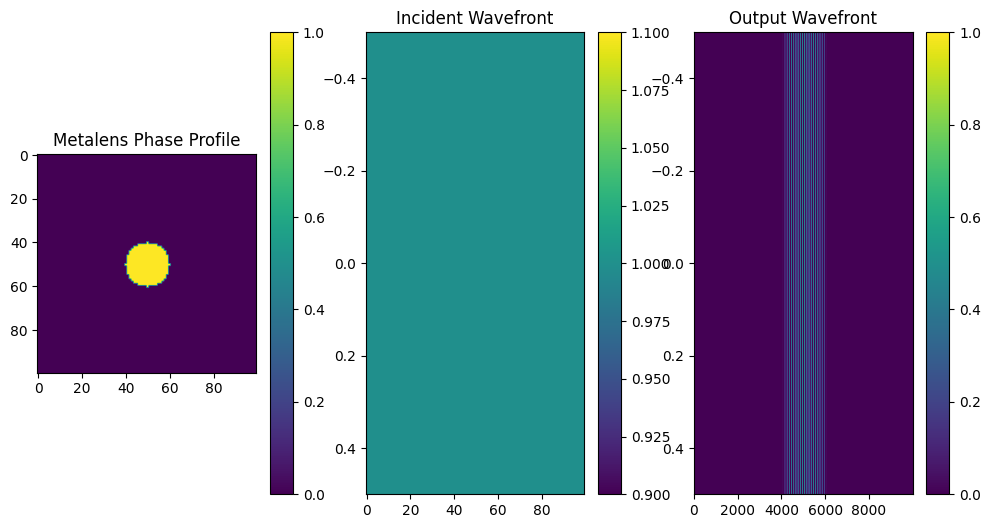

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
wavelength = 0.5  # Wavelength of light in micrometers
grid_size = 100    # Size of the simulation grid
radius = 10        # Radius of the metalens in grid units

# Initialize the simulation grid
grid = np.zeros((grid_size, grid_size), dtype=np.complex128)

# Set up the incident wave
incident_wave = np.exp(2j * np.pi / wavelength * np.arange(grid_size))

# Apply the metalens phase profile
for i in range(grid_size):
    for j in range(grid_size):
        distance = np.sqrt((i - grid_size // 2)**2 + (j - grid_size // 2)**2)
        if distance <= radius:
            # Metalens phase profile (example: quadratic phase)
            phase = -np.pi / (wavelength * radius**2) * distance**2
            grid[i, j] = np.exp(1j * phase)

# Simulate the propagation through the metalens
output_wave =np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(grid * incident_wave)))))
# output_wave =np.fft.fftshift(np.fft.fft2(np.fft.fftshift(grid * incident_wave)))

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(np.abs(grid), cmap='viridis')
plt.title('Metalens Phase Profile')
plt.colorbar()

plt.subplot(132)
plt.imshow(np.abs(incident_wave.reshape(1, -1)), cmap='viridis', aspect='auto')
plt.title('Incident Wavefront')
plt.colorbar()

plt.subplot(133)
plt.imshow(np.abs(output_wave.reshape(1, -1)), cmap='viridis', aspect='auto')
plt.title('Output Wavefront')
plt.colorbar()

plt.show()



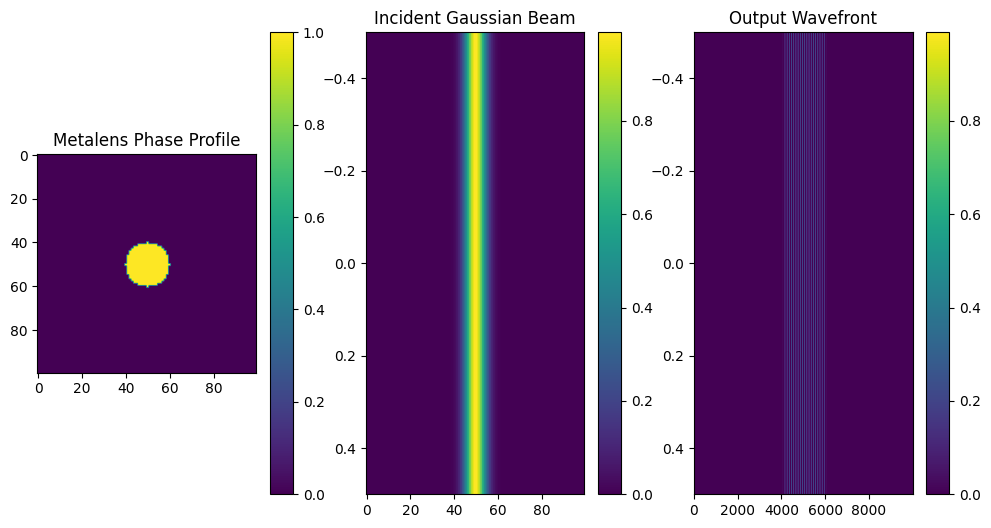

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
wavelength = 0.5  # Wavelength of light in micrometers
grid_size = 100    # Size of the simulation grid
radius = 10        # Radius of the metalens in grid units

# Function to generate a Gaussian beam
def gaussian_beam(x, y, sigma):
    return np.exp(-(x**2 + y**2) / (2 * sigma**2))

# Initialize the simulation grid
grid = np.zeros((grid_size, grid_size), dtype=np.complex128)

# Generate a Gaussian beam
sigma = 5  # Standard deviation of the Gaussian beam
gaussian = gaussian_beam(np.linspace(-grid_size/2, grid_size/2, grid_size),
                         np.linspace(-grid_size/2, grid_size/2, grid_size),
                         sigma)

# Apply the metalens phase profile
for i in range(grid_size):
    for j in range(grid_size):
        distance = np.sqrt((i - grid_size // 2)**2 + (j - grid_size // 2)**2)
        if distance <= radius:
            # Sinusoidal phase profile for a fun effect
            phase = np.sin(2 * np.pi * distance / wavelength)
            grid[i, j] = np.exp(1j * phase)

# Apply the Gaussian beam to the incident wave
incident_wave = gaussian * np.exp(2j * np.pi / wavelength)

# Simulate the propagation through the metalens
output_wave = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(grid * incident_wave)))))

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(np.abs(grid), cmap='viridis')
plt.title('Metalens Phase Profile')
plt.colorbar()

plt.subplot(132)
plt.imshow(np.abs(incident_wave.reshape(1, -1)), cmap='viridis', aspect='auto')
plt.title('Incident Gaussian Beam')
plt.colorbar()

plt.subplot(133)
plt.imshow(np.abs(output_wave.reshape(1, -1)), cmap='viridis', aspect='auto')
plt.title('Output Wavefront')
plt.colorbar()

plt.show()


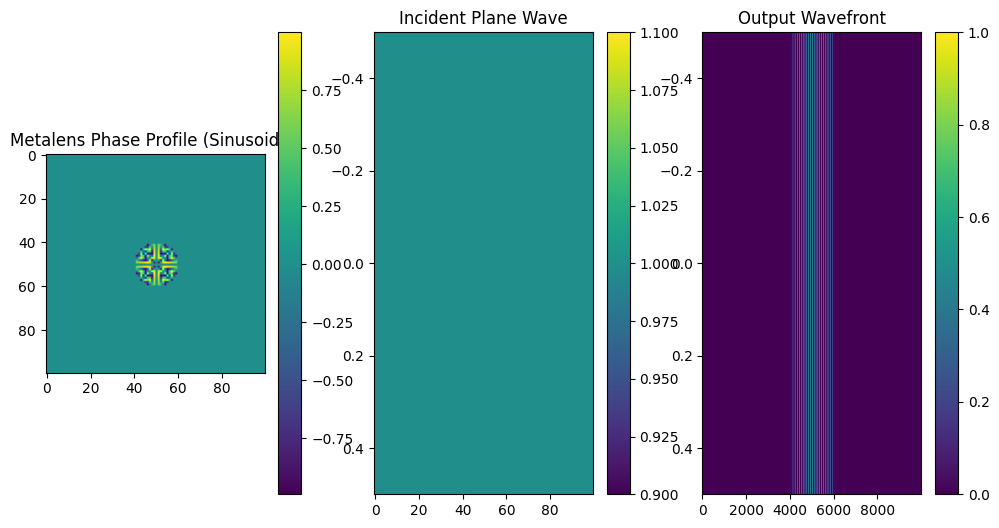

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
wavelength = 0.5  # Wavelength of light in micrometers
grid_size = 100    # Size of the simulation grid
radius = 10        # Radius of the metalens in grid units

# Initialize the simulation grid
grid = np.zeros((grid_size, grid_size), dtype=np.complex128)

# Generate a plane wave as the incident wave
incident_wave = np.exp(2j * np.pi / wavelength * np.linspace(-grid_size/2, grid_size/2, grid_size))

# Apply a sinusoidal phase profile to the metalens
for i in range(grid_size):
    for j in range(grid_size):
        distance = np.sqrt((i - grid_size // 2)**2 + (j - grid_size // 2)**2)
        if distance <= radius:
            # Sinusoidal phase profile for a fun effect
            phase = np.sin(2 * np.pi * distance / wavelength)
            grid[i, j] = np.exp(1j * phase)

# Simulate the propagation through the metalens
output_wave = np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(grid * incident_wave)))))

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(np.angle(grid), cmap='viridis')
plt.title('Metalens Phase Profile (Sinusoidal)')
plt.colorbar()

plt.subplot(132)
plt.imshow(np.abs(incident_wave.reshape(1, -1)), cmap='viridis', aspect='auto')
plt.title('Incident Plane Wave')
plt.colorbar()

plt.subplot(133)
plt.imshow(np.abs(output_wave.reshape(1, -1)), cmap='viridis', aspect='auto')
plt.title('Output Wavefront')
plt.colorbar()

plt.show()
